In [38]:
%matplotlib inline

import numpy as np
np.random.seed(1337) # for reproducibility
import matplotlib.pyplot as plt

In [39]:
import os
from keras.datasets import mnist

In [40]:
#split the data to training and testing sets
(train_feat, train_lbls), (test_feat, test_lbls) = mnist.load_data()

In [41]:
#Process the data (train_feat and test_feat) to 2D structure
train_feat = train_feat.reshape(60000, 784)
test_feat = test_feat.reshape(10000, 784)

In [42]:
#Scale the data in [0;1] instead of int in [0;255]
train_feat = train_feat.astype('float32')
test_feat = test_feat.astype('float32')
train_feat /= 255
test_feat /= 255

In [44]:
#Display the shapes to check if everything's ok
print(train_feat.shape, 'train samples')
print(test_feat.shape, 'test samples')
print(train_lbls.shape)
print(test_lbls.shape)

(60000, 784) train samples
(10000, 784) test samples
(60000,)
(10000,)


In [66]:
#Display some digits
def display(i):
    img = train_feat[i]
    plt.title('Example %d. Label: %d' % (i, train_lbls[i]))
    plt.imshow(img.reshape((28,28)), cmap=plt.cm.gray_r)

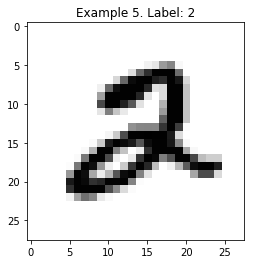

In [75]:
display(5)

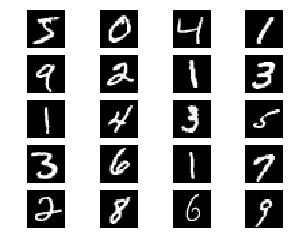

In [70]:
# display the first 20 digits
fig=plt.figure(figsize=(5,4))
for i in range(20):
    ax=fig.add_subplot(5,4,i+1)
    ax.set_axis_off()
    a=np.copy(train_feat[i])
    a=np.reshape(a,(28,28))
    ax.imshow(a, cmap='gray', interpolation='nearest')
plt.show()

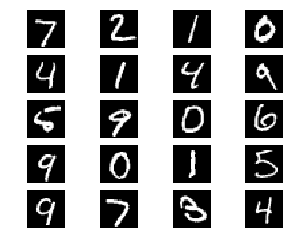

In [74]:
# display the first 20 digits
fig=plt.figure(figsize=(5,4))
for i in range(20):
    ax=fig.add_subplot(5,4,i+1)
    ax.set_axis_off()
    a=np.copy(test_feat[i])
    a=np.reshape(a,(28,28))
    ax.imshow(a, cmap='gray', interpolation='nearest')
plt.show()

In [76]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

In [46]:
#Train the scaler, which standardizes all the features to have mean=0 and unit variance
sc = StandardScaler()
sc.fit(train_feat)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [47]:
#Apply the scaler to the X training data
train_feat_std = sc.transform(train_feat)

#Apply the SAME scaler to the X test data
test_feat_std = sc.transform(test_feat)

In [48]:
#Create a perceptron object with the parameters: 40 iterations (epochs) over the data, and a learning rate of 0.1
ppn = Perceptron(max_iter = 40, eta0 = 0.1, random_state = 0)

#Train the perceptron
ppn.fit(train_feat_std, train_lbls)

Perceptron(alpha=0.0001, class_weight=None, eta0=0.1, fit_intercept=True,
      max_iter=40, n_iter=None, n_jobs=1, penalty=None, random_state=0,
      shuffle=True, tol=None, verbose=0, warm_start=False)

In [49]:
#Apply the trained perceptron on the training data to make predicts for the testing data
lbls_pred = ppn.predict(test_feat_std)

In [50]:
print('Accuracy: %.2f' % accuracy_score(test_lbls, lbls_pred))

Accuracy: 0.89


In [51]:
from sklearn.neural_network import MLPClassifier

In [35]:
#Train MLP with hidden layers of 300 and 100
mlp = MLPClassifier(hidden_layer_sizes=(300,100), max_iter=10, alpha=1e-4,
                    solver='sgd', verbose=10, tol=1e-4, random_state=1,
                    learning_rate_init=.1)

In [52]:
mlp.fit(train_feat, train_lbls)
print("Training set score: %f" % mlp.score(train_feat, train_lbls))
print("Test set score: %f" % mlp.score(test_feat, test_lbls))

Iteration 1, loss = 0.25566087
Iteration 2, loss = 0.09364064
Iteration 3, loss = 0.06261117
Iteration 4, loss = 0.04380513
Iteration 5, loss = 0.03468034
Iteration 6, loss = 0.02596704
Iteration 7, loss = 0.01950265
Iteration 8, loss = 0.01539261
Iteration 9, loss = 0.01111949
Iteration 10, loss = 0.00897009


C:\Users\SUUSER\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Training set score: 0.997883
Test set score: 0.981400


In [53]:
from sklearn.metrics import confusion_matrix

In [54]:
print(confusion_matrix(test_lbls,lbls_pred))

[[ 937    0    4    2    2   15   15    2    2    1]
 [   1 1090    6    1    0    6    3    0   27    1]
 [   6   12  895   13    6    7   15   15   62    1]
 [   6    1   18  877    0   43    4   17   35    9]
 [   7    5   15    4  903    2    5    6   11   24]
 [   9    2    2   41   17  752   15    9   38    7]
 [   7    5   23    1    7   50  853    1   11    0]
 [   3   11   26    4    3    2    0  942    7   30]
 [   9    9   13   16   13   65    5   15  794   35]
 [   8   12    9   20   74   14    0   48   13  811]]


In [77]:
incorrect_indices = np.nonzero(lbls_pred != test_lbls)[0]

In [82]:
# adapt figure size to accomodate 20 subplots
plt.rcParams['figure.figsize'] = (20,20)

figure_evaluation = plt.figure()

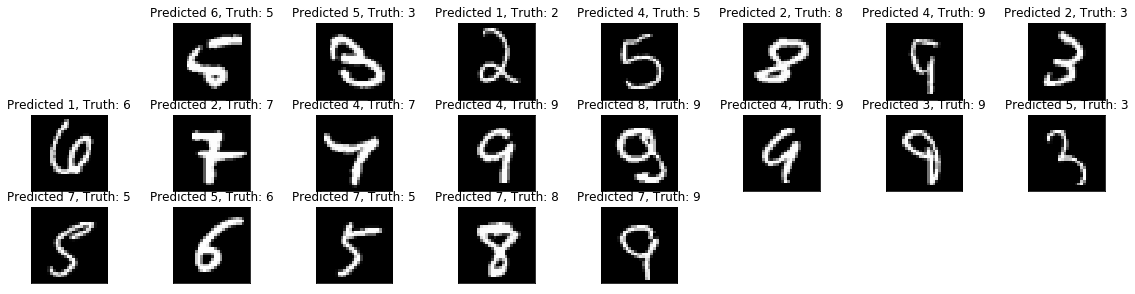

In [85]:
# plot 20 incorrect predictions
for i, incorrect in enumerate(incorrect_indices[:20]):
    plt.subplot(12,8,i+10)
    plt.imshow(test_feat[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title(
      "Predicted {}, Truth: {}".format(lbls_pred[incorrect], 
                                       test_lbls[incorrect]))
    plt.xticks([])
    plt.yticks([])

figure_evaluation